In [1]:
from __future__ import print_function
import pylab as pl
import numpy as np
from scipy.stats import norm as nor
from scipy.optimize import curve_fit, minimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
md = {}
distributions = ['pois', 'gaus', 'chisq', 'logistic', 'binomial']
mymean = 100
df = mymean
mysize = (np.linspace(10,2000,100))
mysize = (mysize).astype(int)
mysize

array([  10,   30,   50,   70,   90,  110,  130,  150,  170,  190,  211,
        231,  251,  271,  291,  311,  331,  351,  371,  391,  412,  432,
        452,  472,  492,  512,  532,  552,  572,  592,  613,  633,  653,
        673,  693,  713,  733,  753,  773,  793,  814,  834,  854,  874,
        894,  914,  934,  954,  974,  994, 1015, 1035, 1055, 1075, 1095,
       1115, 1135, 1155, 1175, 1195, 1216, 1236, 1256, 1276, 1296, 1316,
       1336, 1356, 1376, 1396, 1417, 1437, 1457, 1477, 1497, 1517, 1537,
       1557, 1577, 1597, 1618, 1638, 1658, 1678, 1698, 1718, 1738, 1758,
       1778, 1798, 1819, 1839, 1859, 1879, 1899, 1919, 1939, 1959, 1979,
       2000])

In [26]:
#define a gaussian function
def gaufunction(x, miu, sigma, t):
    a = -(x-miu)**2/(2*sigma**2)
    return t*exp(a)

# Chi-Squared Distribution

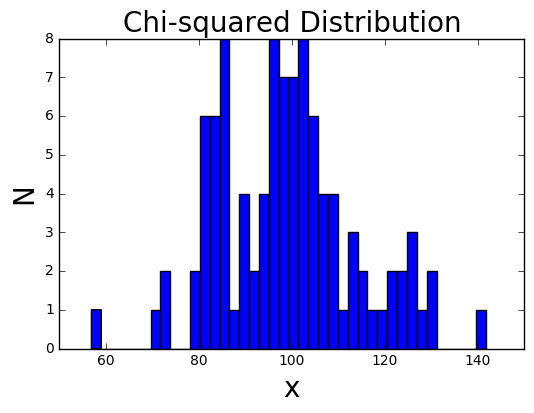

In [4]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins=40)
pl.ylabel('N', fontsize = 20)
pl.xlabel('x', fontsize = 20)
pl.title("Chi-squared Distribution", fontsize = 20)

Figure 1: Chi-Squre Distribution:df = 100, N = 100

In [5]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 98.98, standard deviation: 14.88


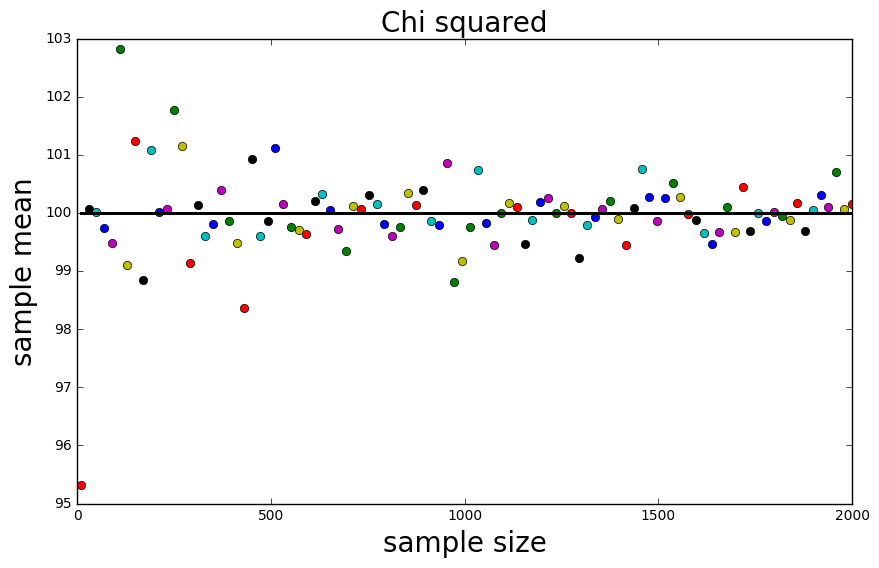

In [6]:
md['chisq'] = {}
for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=20)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=20)
        axchisq_mu_n.set_title('Chi squared', fontsize=20)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Figure 2: the sample mean is getting close to the set mean 100 as the sample size is getting larger. It is in accord with the law of large numbers.

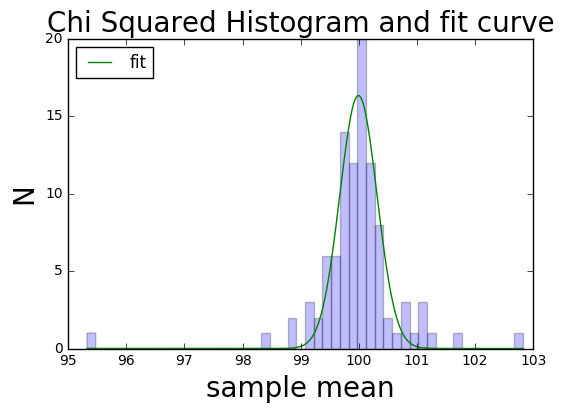

In [41]:
allmeans = list(md['chisq']['means'].values())
(n,bins,patches) = pl.hist(allmeans,bins = 50,alpha = 0.25)
x_lin = np.linspace(bins[0], bins[-1], np.size(n))
x_space = np.linspace(bins[0], bins[-1], 10000)
popt, pcov = curve_fit(gaufunction, x_lin, n, p0 = [100, 1, 1])
y = gaufunction(x_space, *popt)

pl.xlabel('sample mean', fontsize = 20)
pl.ylabel('N', fontsize = 20)
pl.plot(x_space, y, label= 'fit')
pl.legend(loc = "upper left")
pl.title('Chi Squared Histogram and fit curve',fontsize = 20)
pl.show()

Figure 3: As is shown in the distribution figure of sample mean above, the distribution is closed to a normal distribution. As the Central Limit Theorem means that the distribution of the mean of a large number of independent, identically distributed variables will be approximately normal, thus we conclude our experiment is in compliance with Central Limit Theorem.¶

# Gaussian Distribution

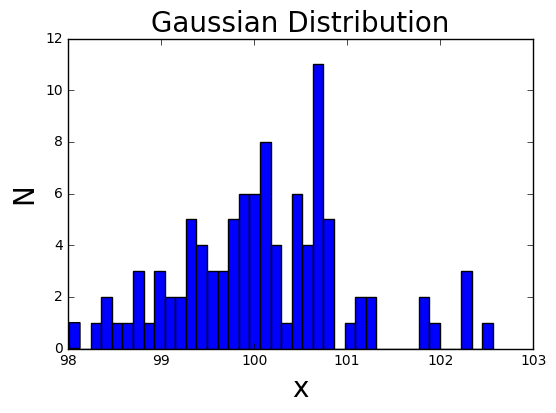

In [8]:
distributions = ['gaus']
md['gaus'] = np.random.normal(mymean, size=100)
pl.hist(md['gaus'], bins = 40)
pl.ylabel('N', fontsize = 20)
pl.xlabel('x', fontsize = 20)
pl.title("Gaussian Distribution", fontsize = 20)

In [9]:
print ("Gaussian mean: %.2f, standard deviation: %.2f"%(md['gaus'].mean(), md['gaus'].std()))

Gaussian mean: 100.09, standard deviation: 0.91


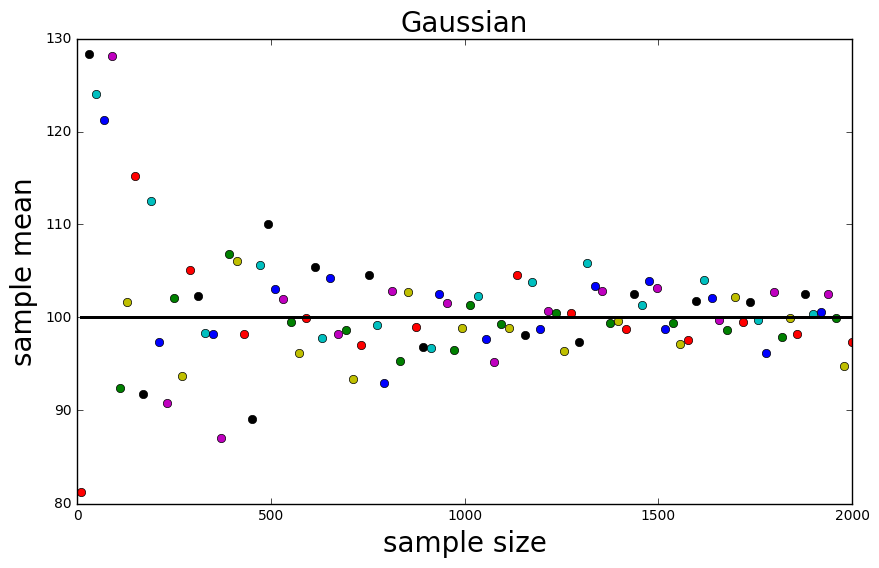

In [10]:
md['gaus'] = {} 

for n in mysize:
    md['gaus'][n] = np.random.normal(mymean, scale = 100, size = n)
       

md['gaus']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['gaus']:
    if not type(nn) == str:
        md['gaus']['means'][nn] = md['gaus'][nn].mean()
        
        axchisq_mu_n.plot(nn, md['gaus']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=20)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=20)
        axchisq_mu_n.set_title('Gaussian', fontsize=20)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [mymean,mymean], 'k')

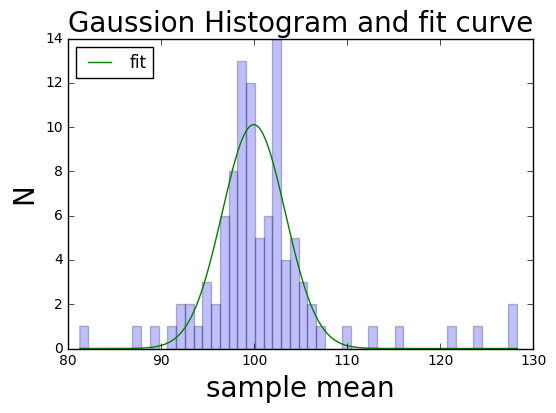

In [40]:
allmeans = list(md['gaus']['means'].values())
(n,bins,patches) = pl.hist(allmeans,bins = 50,alpha = 0.25)
x_lin = np.linspace(bins[0], bins[-1], np.size(n))
x_space = np.linspace(bins[0], bins[-1], 10000)
popt, pcov = curve_fit(gaufunction, x_lin, n, p0 = [100, 1, 1])
y = gaufunction(x_space, *popt)

pl.xlabel('sample mean', fontsize = 20)
pl.ylabel('N', fontsize = 20)
pl.plot(x_space, y, label= 'fit')
pl.legend(loc = "upper left")
pl.title('Gaussion Histogram and fit curve',fontsize = 20)
pl.show()

# Poisson Distribution

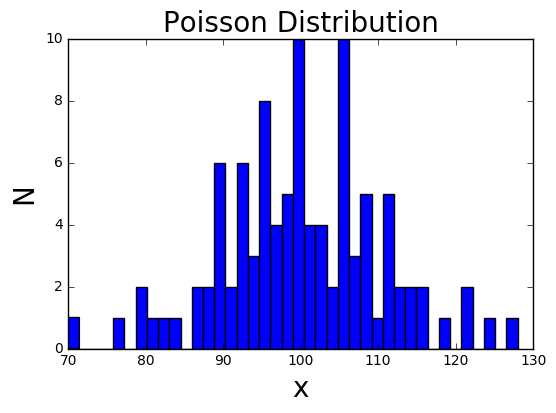

In [12]:
distributions = ['pois']
md['pois'] = np.random.poisson(mymean, 100)
pl.hist(md['pois'], bins = 40)
pl.ylabel('N', fontsize = 20)
pl.xlabel('x', fontsize = 20)
pl.title("Poisson Distribution", fontsize = 20)

In [13]:
print ("Pois mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Pois mean: 99.94, standard deviation: 10.42


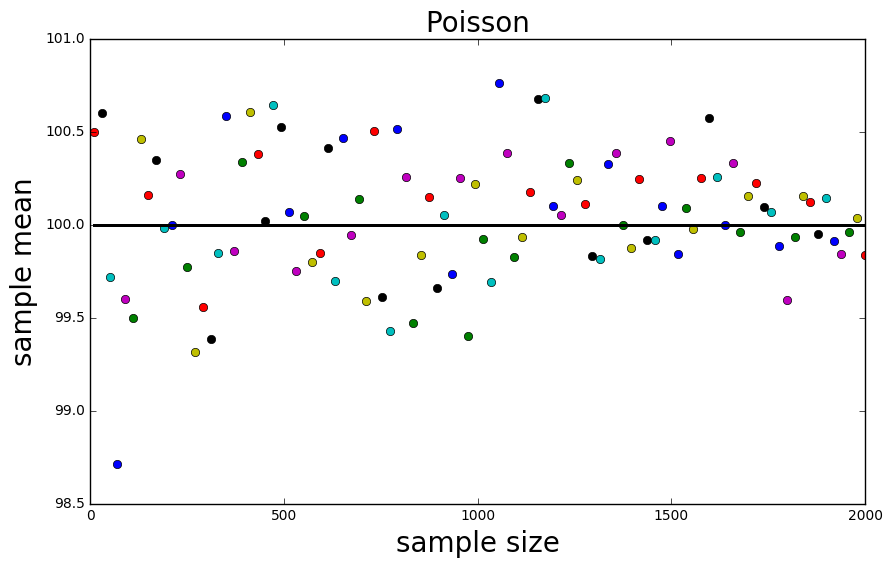

In [14]:
md['pois'] = {} 

for n in mysize:
    md['pois'][n] = np.random.poisson(mymean, size = n)
       

md['pois']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        
        axchisq_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=20)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=20)
        axchisq_mu_n.set_title('Poisson', fontsize=20)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [mymean,mymean], 'k')

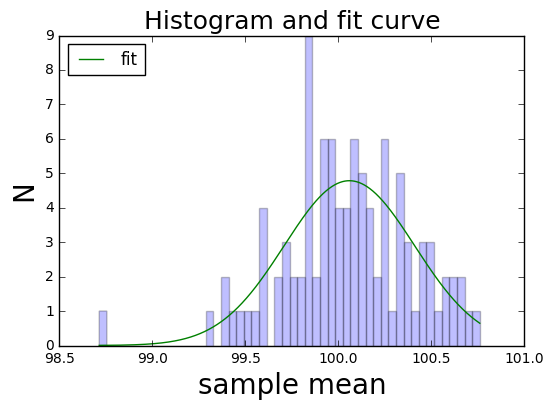

In [37]:
allmeans = list(md['pois']['means'].values())
(n,bins,patches) = pl.hist(allmeans,bins = 50,alpha = 0.25)
x_lin = np.linspace(bins[0], bins[-1], np.size(n))
x_space = np.linspace(bins[0], bins[-1], 10000)
popt, pcov = curve_fit(gaufunction, x_lin, n, p0 = [100, 1, 1])
y = gaufunction(x_space, *popt)

pl.xlabel('sample mean', fontsize = 20)
pl.ylabel('N', fontsize = 20)
pl.plot(x_space, y, label= 'fit')
pl.legend(loc = "upper left")
pl.title('Histogram and fit curve',fontsize = 18)
pl.show()

# Logistic Distribution 

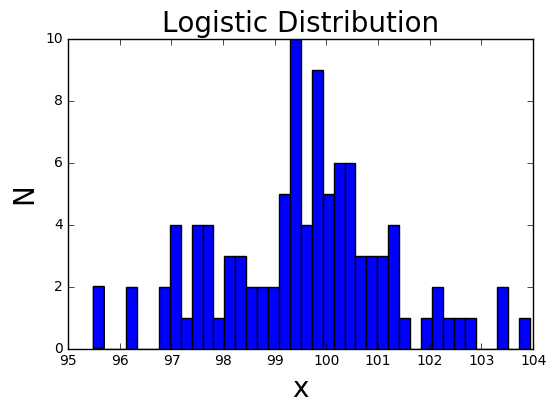

In [44]:
distributions = ['logistic']
md['logistic'] = np.random.logistic(mymean, size = 100)
pl.hist(md['logistic'], bins = 40)
pl.ylabel('N', fontsize = 20)
pl.xlabel('x', fontsize = 20)
pl.title("Logistic Distribution", fontsize = 20)

In [45]:
print ("Logistic mean: %.2f, standard deviation: %.2f"%(md['logistic'].mean(), md['logistic'].std()))

Logistic mean: 99.54, standard deviation: 1.69


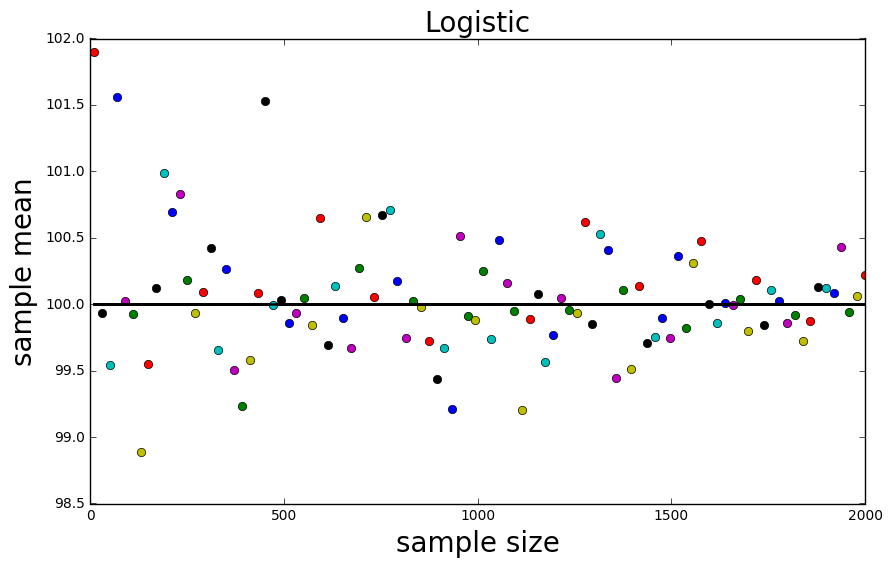

In [50]:
md['logistic'] = {} 

for n in mysize:
    md['logistic'][n] = np.random.poisson(mymean, size = n)
       

md['logistic']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['logistic']:
    if not type(nn) == str:
        md['logistic']['means'][nn] = md['logistic'][nn].mean()
        
        axchisq_mu_n.plot(nn, md['logistic']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=20)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=20)
        axchisq_mu_n.set_title('Logistic', fontsize=20)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [mymean,mymean], 'k')

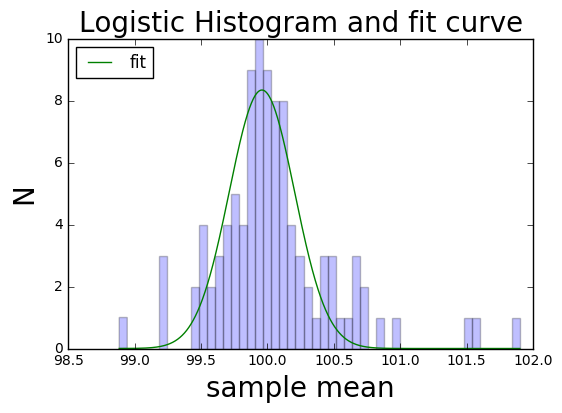

In [52]:
allmeans = list(md['logistic']['means'].values())
(n,bins,patches) = pl.hist(allmeans,bins = 50,alpha = 0.25)
x_lin = np.linspace(bins[0], bins[-1], np.size(n))
x_space = np.linspace(bins[0], bins[-1], 10000)
popt, pcov = curve_fit(gaufunction, x_lin, n, p0 = [100, 1, 1])
y = gaufunction(x_space, *popt)

pl.xlabel('sample mean', fontsize = 20)
pl.ylabel('N', fontsize = 20)
pl.plot(x_space, y, label= 'fit')
pl.legend(loc = "upper left")
pl.title('Logistic Histogram and fit curve',fontsize = 20)
pl.show()

# Binomial Distribution

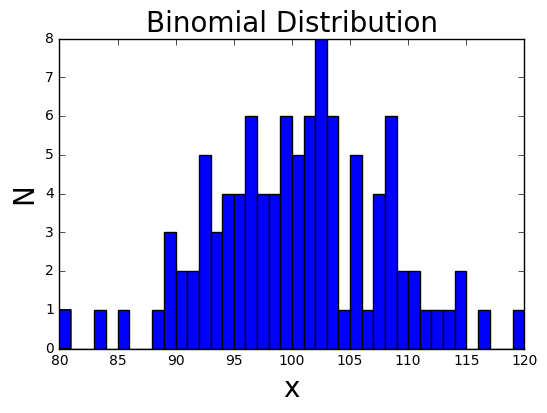

In [54]:
distributions = ['binomial']
md['binomial'] = np.random.binomial(n = 200, p = 0.5, size = 100)
pl.hist(md['binomial'], bins = 40)
pl.ylabel('N', fontsize = 20)
pl.xlabel('x', fontsize = 20)
pl.title("Binomial Distribution", fontsize = 20)

In [55]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 99.99, standard deviation: 7.31


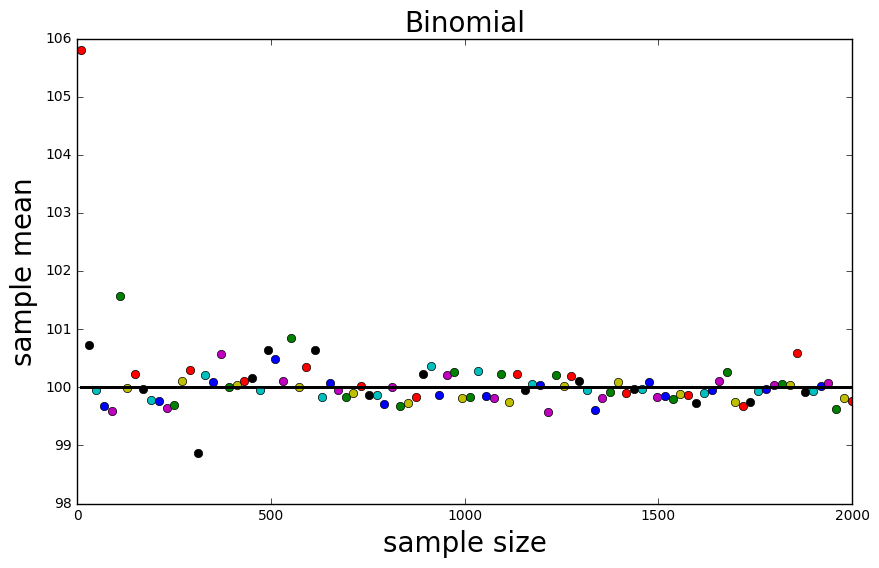

In [66]:
md['binomial'] = {} 

for n in mysize:
    md['binomial'][n] = np.random.binomial(200,0.5,n)
       

md['binomial']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        
        axchisq_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=20)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=20)
        axchisq_mu_n.set_title('Binomial', fontsize=20)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [mymean,mymean], 'k')

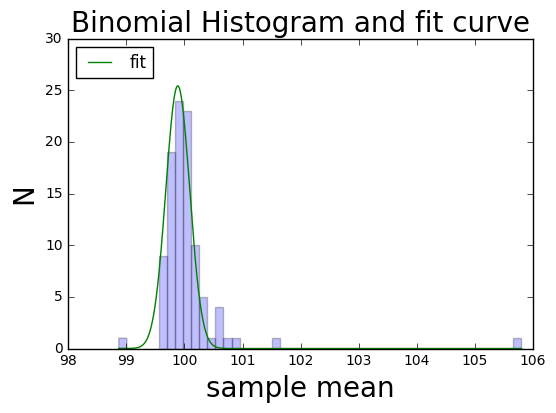

In [67]:
allmeans = list(md['binomial']['means'].values())
(n,bins,patches) = pl.hist(allmeans,bins = 50,alpha = 0.25)
x_lin = np.linspace(bins[0], bins[-1], np.size(n))
x_space = np.linspace(bins[0], bins[-1], 10000)
popt, pcov = curve_fit(gaufunction, x_lin, n, p0 = [100, 1, 1])
y = gaufunction(x_space, *popt)

pl.xlabel('sample mean', fontsize = 20)
pl.ylabel('N', fontsize = 20)
pl.plot(x_space, y, label= 'fit')
pl.legend(loc = "upper left")
pl.title('Binomial Histogram and fit curve',fontsize = 20)
pl.show()